<a href="https://colab.research.google.com/github/ramansuri83/UT-AIML-Projects/blob/main/Project_Plant_Seedlings_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Seedlings Image Classification Project

## Objective:

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

## Context: 
Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

## Learning Outcomes
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

### Guide

Here are the points which will help you to solve the problem efficiently:
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
-  Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

##Points Distribution:

1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
  - Normalization.
  - Gaussian Blurring.
  - Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
  -  Convert labels to one-hot-vectors.
  - Print the label for y_train[0].
  - Split the dataset into training, testing, and validation set.
  (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
  d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
  - Define layers.
  - Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)


First let us mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lets load all the libraries we will need
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
import matplotlib
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Lets load the dataset, check the shapes and try to visualize the images

In [4]:
#Lets load the images
images = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')


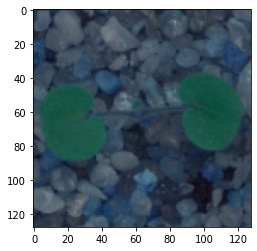

In [5]:
#Lets see the first seedlingimage
plt.imshow(images[0])

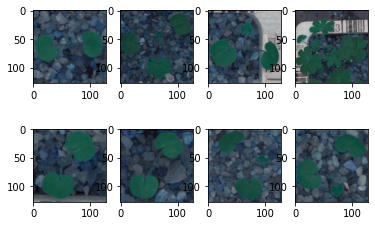

In [6]:
#Lets see some more images and see if we can see some differences
for i in range(8):
    plt.subplot(2, 4, i + 1) #2 rows, 4 columns and index = i+ 1
    plt.imshow(images[i])


In [ ]:
#Lets see the shape of the image
print('images shape:', images.shape)

images shape: (4750, 128, 128, 3)


There seems to be 4750 images with size 128X128X3 (the image is in coleor)

In [ ]:
print('images pixel values', images.min(), images.max(), images.mean(), images.std())

images pixel values 0 255 70.04363745545504 31.996876308515


In [8]:
#Since the labels are provided in a separate file, lets load them
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')


In [ ]:
print('labels shape:', labels.shape)

labels shape: (4750, 1)


In [9]:
#Lets check the labels. they should store th name of the seedlings
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [17]:
#Lets check if there are any null entries
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


There are no null entries and seems like there 4750 labels as expected

##Lets do data pre-processing

Here we will do the following

- Normalization
- Gaussian Blurring
- Visualize data after pre-processing

We will do Gaussian blurring first and then we will normalization

In [18]:
#Lets do gaussian blurring first. we will do this on a copy
images_blur = images.copy()

In [19]:
#Now lets execute the blurring
for idx, img in enumerate(images_blur):
  images_blur[idx] = cv2.GaussianBlur(img, (5, 5), 0)

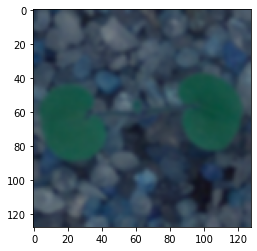

In [22]:
#Lets see how it went
plt.imshow(images_blur[0])

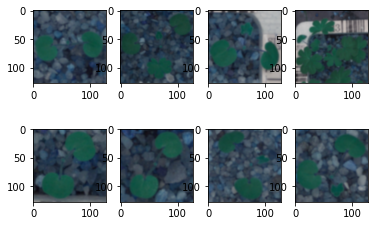

In [23]:
#We cannot just trust first picture. Lets check some more pictures
for i in range(8):
    plt.subplot(2, 4, i + 1) #2 rows, 4 columns and index = i+ 1
    plt.imshow(images_blur[i])

In [24]:
#Lets start the nomalization process. we will again do this on a copy
images_norm = images_blur.copy()


In [25]:
images_norm = images_norm.astype('float32') / 255.0

In [26]:
#Lets cheeck the images were nomalized by checking the pixel values
print('images pixel values before normalization', images_blur.min(), images_blur.max(), images_blur.mean(), images_blur.std())
print('images pixel values after normalization', images_norm.min(), images_norm.max(), images_norm.mean(), images_norm.std())

images pixel values before normalization 0 255 70.04312422474644 30.168520690702
images pixel values after normalization 0.0 1.0 0.27467832 0.11830778


Its clear that the normalization has worked.


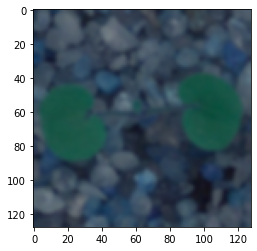

In [27]:
#Lets make sure we have not broken the images. lets check some
plt.imshow(images_norm[0])

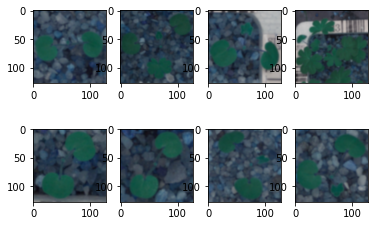

In [28]:
# Lets check some more images

for i in range(8):
    plt.subplot(2, 4, i + 1) #2 rows, 4 columns and index = i+ 1
    plt.imshow(images_norm[i])

# Lets Make the data compatible for modeling

In this section we will do the following:

- Convert labels to one hot vectors
- print the label for y_train()
- Split the dataset into training, testing. and validation set

In [29]:
#Lets check the labels and their unique vlaues
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [32]:
#Lets check the shape again
labels.shape

(4750, 1)

In [35]:
# Lets assign the values to variable y
y = labels[['Label']].values

In [36]:
#Lets quickly check what y looks like
y

array([['Small-flowered Cranesbill'],
       ['Small-flowered Cranesbill'],
       ['Small-flowered Cranesbill'],
       ...,
       ['Loose Silky-bent'],
       ['Loose Silky-bent'],
       ['Loose Silky-bent']], dtype=object)

In [37]:
#Lets run the label binarizer to convert the values into one hot vector. we will use the label binarizer for this
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()

In [38]:
#Lets fit the transformation
y = enc.fit_transform(y)

In [39]:
#Lets check y
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
#Lets check some random y values
print(y[0])
print(y[498])
print(y[973])
print(y[1204])
print(y[1425])

[0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0]


In [41]:
#Lets assign the label to their respective numbers
label_dict =  {0:'Black-grass', 1:'Charlock', 2:'Cleavers', 3:'Common-Chickweed', 4:'Common-wheat', 5:'Fat-Hen', 6:'Loose-Silky-bent', 7:'Maize', 8:'Scentless-Mayweed', 9:'Shepherds-Purse', 10:'Small-flowered-Cranesbill', 11:'Sugar-beet'}

In [42]:
#Lets assign the noarmalized images pixel values to X
X = images_norm

In [43]:
#Lets do the training and testing split
#First we will do the 70/30 split between Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [44]:
#Lets further do a 50/50 split for the test into test and validation data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 7)

In [45]:
#Lets check the size
#If we did things right the Train set should have 3325 images, and 1425 images should be split between test and validation data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 128, 128, 3)
(713, 128, 128, 3)
(712, 128, 128, 3)
(3325, 12)
(713, 12)
(712, 12)


## The shapes are now ready and compatible with the Keras modeling that we are about to do

In [67]:
#Lets print the label for y_train[0] as requested by the project assignment
print(y_train[0])
label1 = np.argmax(y_train, axis = 1)[0]
print(label1)
print (label_dict[label1])

[0 0 0 1 0 0 0 0 0 0 0 0]
3
Common-Chickweed


## Lets build the Model and define all its layers

In [68]:
# Let us set the CNN model first

batch_size = None
# we will build a sequential model
model = models.Sequential()

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

In [78]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 20
num_predictions = 20

In [70]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [72]:
# initiate Adam optimizer as requested by the assignment
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [73]:
# Let's train the model using RMSprop, use loss as categorical crossentropy as asked by the assignment
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Epoch 1/20
104/104 [==============================] - 3s 28ms/step - loss: 0.3306 - accuracy: 0.8881 - val_loss: 0.3631 - val_accuracy: 0.9003

Epoch 00001: val_loss improved from 0.38860 to 0.36311, saving model to cifar_cnn_checkpoint_01_loss0.3631.h5
Epoch 2/20
104/104 [==============================] - 3s 27ms/step - loss: 0.3621 - accuracy: 0.8746 - val_loss: 1.7766 - val_accuracy: 0.5056

Epoch 00002: val_loss did not improve from 0.36311
Epoch 3/20
104/104 [==============================] - 3s 28ms/step - loss: 0.3439 - accuracy: 0.8764 - val_loss: 0.5732 - val_accuracy: 0.7921

Epoch 00003: val_loss did not improve from 0.36311
Epoch 4/20
104/104 [==============================] - 3s 28ms/step - loss: 0.3514 - accuracy: 0.8794 - val_loss: 0.5503 - val_accuracy: 0.7978

Epoch 00004: val_loss did not improve from 0.36311
Epoch 5/20
104/104 [==============================] - 3s 28ms/step - loss: 0.3472 - accuracy: 0.8860 - val_loss: 0.6049 - val_accuracy: 0.7739

Epoch 00005: val_

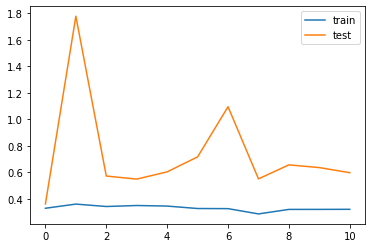

In [80]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)       

# Lets Evaluate the model and check confusion matrix

In [84]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 11ms/step - loss: 0.6603 - accuracy: 0.7966
Test loss: 0.6602597236633301
Test accuracy: 0.7966339588165283


In [85]:
# Lets first get the predicted values
y_predicted = model.predict(X_test)

In [87]:
#The sigmoid function returns the probabilities. lets check them
print(y_predicted.shape)
y_predicted

(713, 12)


array([[2.6259318e-11, 7.0520748e-08, 1.8069460e-06, ..., 6.6974940e-07,
        9.9959642e-01, 7.7424016e-07],
       [3.7883543e-03, 4.6348848e-04, 3.9600503e-02, ..., 1.6484369e-03,
        7.3160771e-03, 2.0706840e-01],
       [2.5388692e-04, 1.7273678e-05, 2.2787612e-02, ..., 2.1365926e-02,
        1.4916782e-02, 2.3965584e-01],
       ...,
       [7.5012395e-05, 2.0681990e-03, 2.2133589e-01, ..., 3.2599546e-05,
        2.2300470e-03, 1.5309476e-04],
       [3.3691655e-10, 4.1636176e-05, 8.0729969e-04, ..., 1.2755027e-04,
        9.9600261e-01, 9.0044938e-05],
       [2.4843144e-05, 8.6561388e-01, 4.8853274e-02, ..., 2.3471562e-03,
        3.1583416e-03, 4.6977196e-02]], dtype=float32)

In [88]:
#Lets convert the probabilities into label ID with which we can then predcit the labels
y_classes = np.argmax(y_predicted, axis = 1) 

In [89]:
y_classes

array([10,  5,  3,  2,  0, 11,  2,  2,  5, 10,  5,  6,  5,  6, 11,  3,  5,
       11, 11,  7, 11,  5, 10,  6,  5,  9,  3, 11,  9,  6, 11,  5,  5,  9,
        6,  0,  5,  2,  7,  5,  5,  2,  7,  5,  8,  7, 10,  1,  9, 10,  1,
        4,  6,  1,  2,  6,  3, 11,  4,  5,  6,  5,  9,  3,  0,  7,  5,  2,
        4, 10,  3,  4,  5, 10,  1,  6,  2,  6, 10,  9,  5,  1,  5, 11,  6,
        5, 10,  1, 10, 11,  5, 10,  8, 11,  0,  4,  3,  0,  9,  9,  2, 10,
        2,  6, 10, 10,  5, 11,  3, 10,  6,  1, 10,  3,  9, 11,  3, 11, 11,
        9,  3,  2,  0,  5,  5, 11,  4,  9, 10,  3,  5,  0,  2, 11,  6,  1,
        1, 10, 10,  1, 11,  8,  0,  0,  8,  3,  0, 11, 11,  4,  5,  5,  1,
        8, 11, 10,  4,  0,  0,  2,  3,  1, 10,  5, 10,  8,  0,  3, 11, 11,
        8,  5, 11,  3, 10,  2, 11,  1,  2,  1,  6,  3,  5, 11,  1,  5,  0,
        2,  5,  9,  2,  5,  6,  6,  0, 10, 11,  5,  5,  2,  0,  6,  2, 10,
       11, 11, 10, 10,  3, 11,  7,  0,  0,  5,  9,  5, 10, 10,  6,  3,  7,
        2, 10, 11,  5,  5

In [90]:
#Now lets also do the same with true labels which we will compare with the predicted labels
y_true = np.argmax(y_test, axis = 1)

In [91]:
y_true

array([10,  5,  3,  2,  0,  8,  1,  2,  5, 10,  5,  0,  5, 10, 11,  3,  5,
       11,  8,  7,  4,  5, 10,  6,  5,  9,  3, 11,  8,  6, 11,  5,  5,  9,
        6,  6,  5,  2,  7,  5,  5,  2,  7,  5,  8,  7, 10,  1,  9, 10,  1,
        4,  6,  8,  2,  6,  3, 11,  4,  5,  6,  5,  8,  3,  0,  7,  5,  2,
        4, 10,  3,  4,  5,  8,  8,  6,  2,  8, 10,  8,  5,  1,  5,  8,  6,
        5, 10,  1, 10,  8,  5,  1,  8,  8,  6,  4,  3,  0,  9,  9,  2,  8,
       10,  6, 10, 10,  5, 11,  3, 10,  6,  1, 10,  3,  8,  8,  3, 11, 11,
        8,  3,  2,  6,  5,  5, 11,  4,  9, 10,  3,  5,  6,  2, 11,  6,  1,
        1,  8, 10,  1,  2,  8,  0,  0,  8,  3,  0,  3,  9,  4,  5,  5,  8,
        8, 11, 10,  7,  6,  6,  1,  3,  1, 10,  5, 10,  8,  0,  3, 11, 11,
        8,  5, 11,  3, 10,  2,  8,  1,  2,  1,  6,  3,  5, 11,  1,  5,  0,
        2,  5,  8,  2,  5,  6,  0,  0, 10, 11,  5,  5,  2,  6,  6,  2,  3,
       11, 11, 10, 10,  3,  8,  7,  0,  6,  5,  8,  5, 10, 10,  0,  3,  7,
        2, 10, 11,  5,  5

In [92]:
#Lets get all the mterics including confusion matrix
cm = confusion_matrix(y_true, y_classes)
print(cm)
accuracy_score(y_true, y_classes)
print('Accuracy: '+ str(accuracy_score(y_true, y_classes)))

[[29  0  0  0  2  0  7  0  0  0  0  0]
 [ 0 46 11  0  0  0  0  0  0  0  1  0]
 [ 0  0 46  0  0  0  0  0  0  0  0  1]
 [ 1  0  0 73  0  5  0  0  0  3  3  1]
 [ 2  0  0  0 24  2  0  0  0  0  0  2]
 [ 0  0  0  0  0 86  1  0  0  0  0  0]
 [20  0  0  0  0  0 74  0  0  0  0  1]
 [ 0  1  0  0  4  0  0 28  0  0  4  1]
 [ 0  5  2  1  0  0  2  0 23 23 13 17]
 [ 0  0  0  1  0  0  0  0  0 24  3  1]
 [ 0  0  1  0  0  1  1  0  0  0 62  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 53]]
Accuracy: 0.7966339410939691


# Finally lets visualize the predictions for x_test[2], x_test[3], x_test[33}, x_test[36], x_test[59]

Label 
 Label Id: 3 
 Name: Common-Chickweed


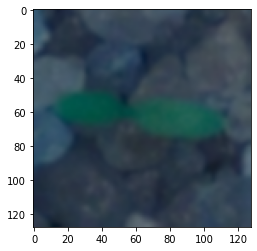

In [93]:
i = 2
image = X_test[i]
label = y_classes[i]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

Label 
 Label Id: 2 
 Name: Cleavers


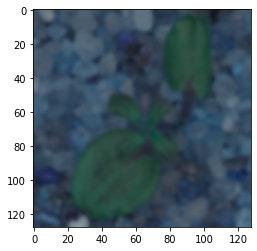

In [94]:
i = 3
image = X_test[i]
label = y_classes[i]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

Label 
 Label Id: 9 
 Name: Shepherds-Purse


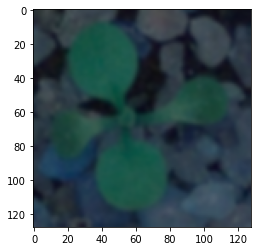

In [95]:
i = 33
image = X_test[i]
label = y_classes[i]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

Label 
 Label Id: 5 
 Name: Fat-Hen


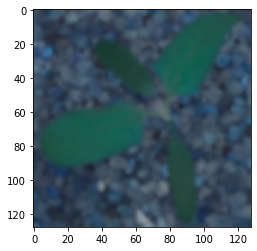

In [96]:
i = 36
image = X_test[i]
label = y_classes[i]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);

Label 
 Label Id: 5 
 Name: Fat-Hen


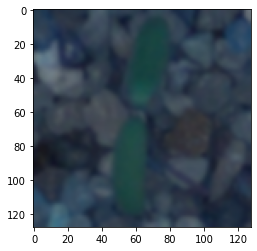

In [97]:
i = 59
image = X_test[i]
label = y_classes[i]
print(f'Label \n Label Id: {label} \n Name: {label_dict[label]}')
plt.imshow(image);